# The Battle of Neighborhoods - Capstone Project

**Introduction**

New York City's demographics show that it is a large and ethnically diverse metropolis. It is the largest city in the United States with a long history of international immigration. New York City has been a major point of entry for immigrants; the term "melting pot" was coined to describe densely populated immigrant neighborhoods on the Lower East Side. As many as 800 languages are spoken in New York, making it the most linguistically diverse city in the world. English remains the most widely spoken language, although there are areas in the outer boroughs in which up to 25% of people speak English as an alternate language, and/or have limited or no English language fluency. English is least spoken in neighborhoods such as Flushing, Sunset Park, and Corona.

With it's diverse culture, comes diverse food items. There are many restaurants in New York City, each belonging to different categories like Chinese, Indian, French, etc.

So the objective of this project is to list and visualize all major parts of New York City that have great Indian restaurants.

# Data

**New York City data that contains list Boroughs, Neighborhoods along with their latitude and longitude.**

Data source : https://cocl.us/new_york_dataset 

Description : This data set contains the required information. And we will use this data set to explore various neighborhoods of new york city.

**Indian restaurants in each neighborhood of new york city.**

Data source : Foursquare API

Description : By using this api we will get all the venues in each neighborhood. We can filter these venues to get only Indian restaurants

**GeoSpace data**

Data source : https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm

Description : By using this geo space data we will get the New york Borough boundaries that will help us visualize choropleth map.

# Approach


    1. Collect the new york city data from https://cocl.us/new_york_dataset
    2. Using FourSquare API we will find all venues for each neighborhood.
    3. Filter out all venues that are Indian Restaurants.
    4. Find rating, tips and like count for each Indian Resturants using FourSquare API.
    5. Using rating for each resturant, we will sort that data.
    6. Visualize the Ranking of neighborhoods using folium library(python)
    


# Results

The results are carried out to give the answer of the following questions:

What is the best location in New York City for Indian Cuisine?

Which areas have a potential Indian Restaurant Market?

Which are some of the best neighborhoods for Indian cuisine?

Which is the best place to stay if you prefer Indian Cuisine?

**Analysis is done with required python libraries**


    + pandas and numpy for handling data.
    + request module for using FourSquare API.
    + geopy to get co-ordinates of City of New York.
    + folium to visualize the results on a map


In [3]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
import sys
from bs4 import BeautifulSoup
import os
!conda install -c conda-forge folium=0.5.0 --ye
import folium # map rendering library
from geopy.geocoders import Nominatim 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline


print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                       

In [4]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude



In [5]:
def get_venues(lat,lng):
    
    #set variables
    radius=500
    LIMIT=50
    CLIENT_ID = 'JKFFZBGKH1M0JVNSIQYQNYTCHXPTE0YHHYST31HEJ3AQLYGK' # changed my Foursquare ID
    CLIENT_SECRET = 'L0MDDMXN14Z50FQISNBWDYDBQHUPQYB2LGYKAMRHM03YM53O' # changed Foursquare Secret
    VERSION = '20180605' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    print("done")
    return df

In [6]:
def get_venue_details(venue_id):
        
    CLIENT_ID = 'JKFFZBGKH1M0JVNSIQYQNYTCHXPTE0YHHYST31HEJ3AQLYGK' # changed my Foursquare ID
    CLIENT_SECRET = 'L0MDDMXN14Z50FQISNBWDYDBQHUPQYB2LGYKAMRHM03YM53O' # changed Foursquare Secret
    VERSION = '20180605' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [7]:
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return new_york_data

In [8]:
# get new york data
new_york_data=get_new_york_data()
new_york_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [9]:
new_york_data.shape

(306, 4)

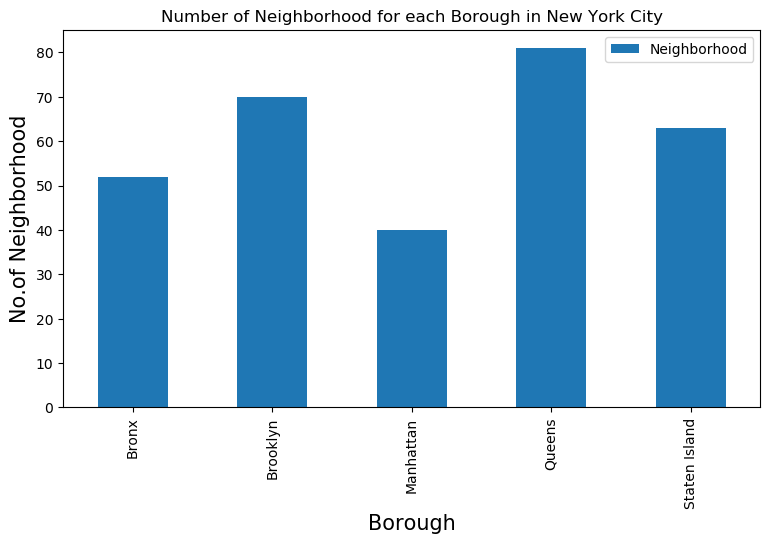

In [10]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Neighborhood for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
new_york_data.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

**Collect Indian resturants for each Neighborhood**

In [12]:
# prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name']
indian_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in new_york_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    indian_resturants=venues[venues['Category']=='Indian Restaurant']   
    print('(',count,'/',len(new_york_data),')','Indian Resturants in '+Neighborhood+', '+Borough+':'+str(len(indian_resturants)))
    for resturant_detail in indian_resturants.values.tolist():
        id, name , category=resturant_detail
        indian_rest_ny = indian_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

done
( 1 / 306 ) Indian Resturants in Wakefield, Bronx:0
done
( 2 / 306 ) Indian Resturants in Co-op City, Bronx:0
done
( 3 / 306 ) Indian Resturants in Eastchester, Bronx:0
done
( 4 / 306 ) Indian Resturants in Fieldston, Bronx:0
done
( 5 / 306 ) Indian Resturants in Riverdale, Bronx:0
done
( 6 / 306 ) Indian Resturants in Kingsbridge, Bronx:0
done
( 7 / 306 ) Indian Resturants in Marble Hill, Manhattan:0
done
( 8 / 306 ) Indian Resturants in Woodlawn, Bronx:1
done
( 9 / 306 ) Indian Resturants in Norwood, Bronx:0
done
( 10 / 306 ) Indian Resturants in Williamsbridge, Bronx:0
done
( 11 / 306 ) Indian Resturants in Baychester, Bronx:0
done
( 12 / 306 ) Indian Resturants in Pelham Parkway, Bronx:0
done
( 13 / 306 ) Indian Resturants in City Island, Bronx:0
done
( 14 / 306 ) Indian Resturants in Bedford Park, Bronx:0
done
( 15 / 306 ) Indian Resturants in University Heights, Bronx:0
done
( 16 / 306 ) Indian Resturants in Morris Heights, Bronx:0
done
( 17 / 306 ) Indian Resturants in Ford

In [13]:
indian_rest_ny.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Woodlawn,4c0448d9310fc9b6bf1dc761,Curry Spot
1,Bronx,Unionport,4c194631838020a13e78e561,Melanies Roti Bar And Grill
2,Brooklyn,Gowanus,52f18573498ec2c34e830ffd,Kanan's Indian Restaurant
3,Brooklyn,Fort Greene,57596dad498e732300496b23,Dosa Royale
4,Brooklyn,Clinton Hill,568d3902498e619efcbc3f58,Spice & Grill


In [14]:
indian_rest_ny.shape

(47, 4)

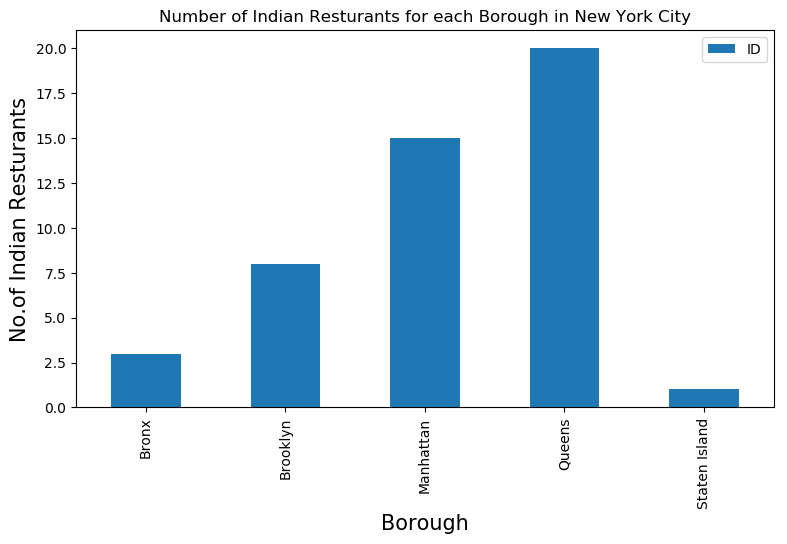

In [15]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Indian Resturants for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Indian Resturants', fontsize=15)
#giving a bar plot
indian_rest_ny.groupby('Borough')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

We can see that Queens in New York has highest number of restaurants i.e 20

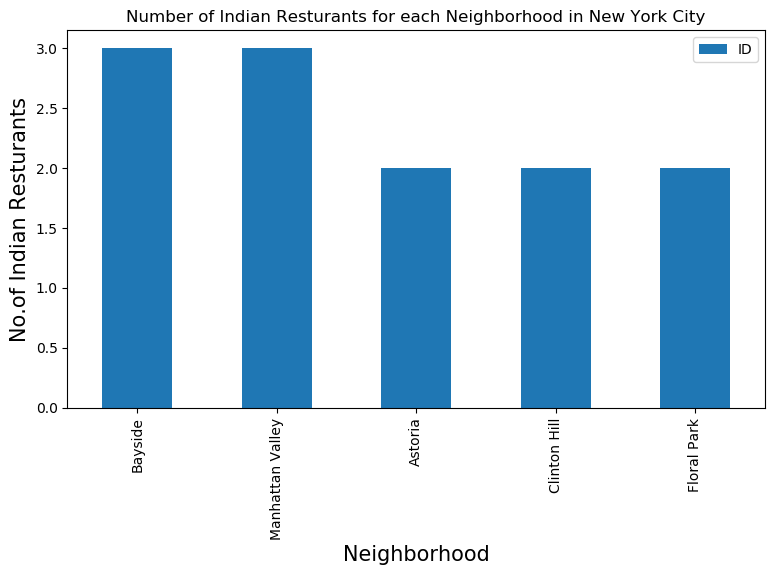

In [16]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Indian Resturants for each Neighborhood in New York City')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Indian Resturants', fontsize=15)
#giving a bar plot
indian_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(5).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

Thus Bayside in Queens has highest number of restaurants i.e 3

In [17]:
indian_rest_ny[indian_rest_ny['Neighborhood']=='Bayside']

,Borough,Neighborhood,ID,Name
28,Queens,Bayside,4f1f4996e4b01ff351a7a50c,Ayna Agra Indian Restaurant
29,Queens,Bayside,539a4ff0498e79c6745baba9,Masala Box
30,Queens,Bayside,539e27b0498e2eba582085ee,masalabox


In [18]:
# get the ranking of each resturant for further analysis.
# prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
indian_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1


for row in indian_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(indian_rest_ny),')','processed')
    indian_rest_stats_ny = indian_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID        Name  Likes  Rating  Tips
0  4c0448d9310fc9b6bf1dc761  Curry Spot      5     8.0    10
( 1 / 47 ) processed
                         ID                         Name  Likes  Rating  Tips
0  4c194631838020a13e78e561  Melanies Roti Bar And Grill      3     6.3     2
( 2 / 47 ) processed
                         ID                       Name  Likes  Rating  Tips
0  52f18573498ec2c34e830ffd  Kanan's Indian Restaurant     24     7.5     8
( 3 / 47 ) processed
                         ID         Name  Likes  Rating  Tips
0  57596dad498e732300496b23  Dosa Royale     75     8.7    22
( 4 / 47 ) processed
                         ID           Name  Likes  Rating  Tips
0  568d3902498e619efcbc3f58  Spice & Grill     20     7.5     6
( 5 / 47 ) processed
                         ID         Name  Likes  Rating  Tips
0  57596dad498e732300496b23  Dosa Royale     75     8.7    22
( 6 / 47 ) processed
                         ID          Name  Likes  Rating  Tips
0  54

In [19]:
indian_rest_stats_ny.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Woodlawn,4c0448d9310fc9b6bf1dc761,Curry Spot,5,8.0,10
1,Bronx,Unionport,4c194631838020a13e78e561,Melanies Roti Bar And Grill,3,6.3,2
2,Brooklyn,Gowanus,52f18573498ec2c34e830ffd,Kanan's Indian Restaurant,24,7.5,8
3,Brooklyn,Fort Greene,57596dad498e732300496b23,Dosa Royale,75,8.7,22
4,Brooklyn,Clinton Hill,568d3902498e619efcbc3f58,Spice & Grill,20,7.5,6


In [20]:
indian_rest_stats_ny.shape

(47, 7)

In [21]:
indian_rest_ny.shape

(47, 4)

In [22]:
# save data to csv
indian_rest_stats_ny.to_csv('indian_rest_stats_ny.csv', index=False)

In [23]:
# Verify csv data
indian_rest_stats_ny_csv=pd.read_csv('indian_rest_stats_ny.csv')
indian_rest_stats_ny_csv.shape

(47, 7)

In [24]:
indian_rest_stats_ny_csv.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Woodlawn,4c0448d9310fc9b6bf1dc761,Curry Spot,5,8.0,10
1,Bronx,Unionport,4c194631838020a13e78e561,Melanies Roti Bar And Grill,3,6.3,2
2,Brooklyn,Gowanus,52f18573498ec2c34e830ffd,Kanan's Indian Restaurant,24,7.5,8
3,Brooklyn,Fort Greene,57596dad498e732300496b23,Dosa Royale,75,8.7,22
4,Brooklyn,Clinton Hill,568d3902498e619efcbc3f58,Spice & Grill,20,7.5,6


In [25]:
indian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 7 columns):
Borough         47 non-null object
Neighborhood    47 non-null object
ID              47 non-null object
Name            47 non-null object
Likes           47 non-null object
Rating          47 non-null float64
Tips            47 non-null object
dtypes: float64(1), object(6)
memory usage: 2.6+ KB


In [26]:
# Need certain Preprocessing
indian_rest_stats_ny['Likes']=indian_rest_stats_ny['Likes'].astype('float64')
indian_rest_stats_ny['Tips']=indian_rest_stats_ny['Tips'].astype('float64')

In [27]:
indian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 7 columns):
Borough         47 non-null object
Neighborhood    47 non-null object
ID              47 non-null object
Name            47 non-null object
Likes           47 non-null float64
Rating          47 non-null float64
Tips            47 non-null float64
dtypes: float64(3), object(4)
memory usage: 2.6+ KB


In [28]:
# Resturant with maximum Likes
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Likes'].idxmax()]

Borough                        Manhattan
Neighborhood                     Tribeca
ID              4bbb9dbded7776b0e1ad3e51
Name                    Tamarind TriBeCa
Likes                                590
Rating                               9.1
Tips                                 148
Name: 16, dtype: object

In [29]:
# Resturant with maximum Rating
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Rating'].idxmax()]

Borough                        Manhattan
Neighborhood                     Tribeca
ID              4bbb9dbded7776b0e1ad3e51
Name                    Tamarind TriBeCa
Likes                                590
Rating                               9.1
Tips                                 148
Name: 16, dtype: object

In [30]:
# Resturant with maximum Tips
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Tips'].idxmax()]

Borough                        Manhattan
Neighborhood                     Tribeca
ID              4bbb9dbded7776b0e1ad3e51
Name                    Tamarind TriBeCa
Likes                                590
Rating                               9.1
Tips                                 148
Name: 16, dtype: object

In [31]:
ny_neighborhood_stats=indian_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']

In [32]:
# The top neighborhoods with top average rating of Indian resturants

ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
30,Tribeca,9.10
21,Noho,8.80
8,Fort Greene,8.70
0,Astoria,8.65
22,North Side,8.50
11,Greenwich Village,8.40
32,Upper West Side,8.40
29,Sutton Place,8.40
4,Civic Center,8.20
5,Clinton Hill,8.10


In [33]:
ny_borough_stats=indian_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']

In [34]:
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
4,Staten Island,8.100
1,Brooklyn,8.075
2,Manhattan,7.940
0,Bronx,7.000
3,Queens,5.580


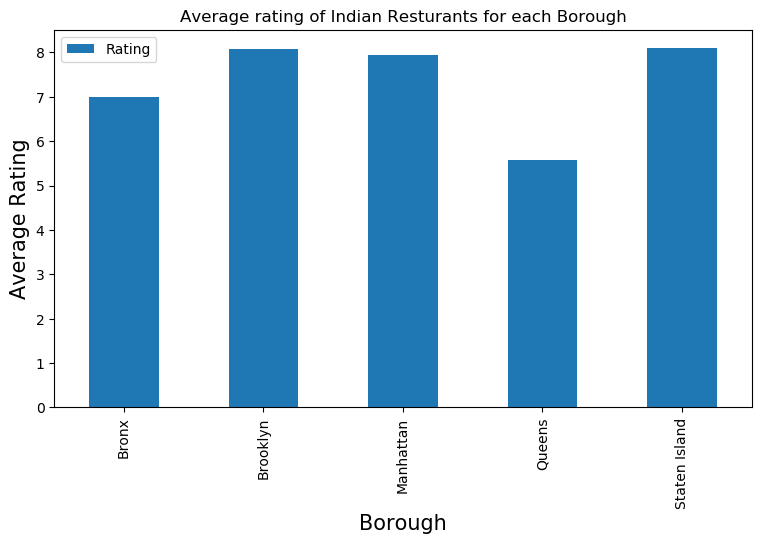

In [35]:
# Visualization
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Average rating of Indian Resturants for each Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
#giving a bar plot
indian_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [36]:
#consider all the neighborhoods with average rating greater or equal 8.0 to visualize on map
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=8.0]

In [37]:
ny_neighborhood_stats

,Neighborhood,Average Rating
0,Astoria,8.65
4,Civic Center,8.20
5,Clinton Hill,8.10
8,Fort Greene,8.70
11,Greenwich Village,8.40
20,New Dorp,8.10
21,Noho,8.80
22,North Side,8.50
29,Sutton Place,8.40
30,Tribeca,9.10


In [38]:
#join this dataset to original new york data to get lonitude and latitude
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,new_york_data, on='Neighborhood')
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]

In [39]:
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Queens,Astoria,40.768509,-73.915654,8.65
1,Manhattan,Civic Center,40.715229,-74.005415,8.20
2,Brooklyn,Clinton Hill,40.693229,-73.967843,8.10
3,Brooklyn,Fort Greene,40.688527,-73.972906,8.70
4,Manhattan,Greenwich Village,40.726933,-73.999914,8.40
5,Staten Island,New Dorp,40.572572,-74.116479,8.10
6,Manhattan,Noho,40.723259,-73.988434,8.80
7,Brooklyn,North Side,40.714823,-73.958809,8.50
8,Manhattan,Sutton Place,40.760280,-73.963556,8.40
9,Manhattan,Tribeca,40.721522,-74.010683,9.10


In [40]:
# Display data on map
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)

In [41]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [42]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'

In [43]:
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add incidents to map
ny_map.add_child(incidents)

# Discussion

The analysis has been carried out to list and visualize all major parts of New York City that has great indian resturants. The restaurant with varous attribues like maximum likes, rating and tips is also provided. The accuracy of data is completely depends on the data provided by FourSquare

# Conclusion

Queens has the largest number of Indian Resturants.

The Bayside in Queens has the highest number of inidan restaurants i.e 3.

Astoria (Queens), Civic Centre (Manhattan), Clinton Hill (Brooklyn) are some of the best neighborhoods for indian cuisine.

Queens and Manhattan are the best places to stay if you prefer Indian Cuisine. 

Astoria (Queens) has the highest rating that is 8.65

Though Manhattan ranks 2nd and Brooklyn ranks 3rd in ranking ; the difference in their average rating is minimal i.e Manahtten is with 8.20 and Brooklyn is with 8.10